In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

import sys 
sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts")

from dotenv import load_dotenv
true = load_dotenv("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/.env")
print(true)
import dask.dataframe as dd
from constants import ConfigPaths
import pybedtools
from pybedtools import BedTool
pybedtools.set_tempdir("/scratch/nmc6088")

True


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
def evaluate_stars(pval: float) -> str:
    if pval < 0.001:
        return "*" * 3
    if pval < 0.01:
        return "*" * 2
    if pval < 0.05:
        return "*"
    return "ns"

In [4]:
!ls /storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/

mutation_merged_complexdel.bed	mutation_merged_mnp.bed
mutation_merged_complexins.bed	mutation_merged_smalldel.bed
mutation_merged_del.bed		mutation_merged_smallins.bed
mutation_merged_ins.bed		mutation_merged_snp.bed


## Mutation Coverage

In [5]:
mutation = [file for file in Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations").glob("*bed")]
mutation

[PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_complexdel.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_complexins.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_del.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_ins.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_mnp.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_smalldel.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_smallins.bed'),
 PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_snp.bed')]

In [6]:
compartments_df = pd.read_table("/storage/group/izg5139/default/nicole/g4_t2t/datasets/compartments_T2T_coding_protein_coding.csv")
compartments_bed = BedTool.from_dataframe(compartments_df[["seqID", "start", "end", "compartment"]]).sort()
compartments_df

,seqID,start,end,compartment,biotype,comp
0,chr1,0,3000,Telomere,.,Telomere
1,chr1,7505,12982,Exon,non_coding,Non Coding Exons
2,chr1,7505,138480,Gene,non_coding,Non Coding Genes
3,chr1,12273,12571,Alu,.,Alu
4,chr1,13444,13584,Exon,non_coding,Non Coding Exons
...,...,...,...,...,...,...
2046768,chrY,62451062,62451171,Exon,non_coding,Non Coding Exons
2046769,chrY,62451556,62451910,Exon,non_coding,Non Coding Exons
2046770,chrY,62451910,62452910,Promoter,non_coding,Non Coding Promoters
2046771,chrY,62452320,62453637,censat,.,censat


In [7]:
regex_df = pd.read_table(ConfigPaths.G4REGEX.value)
regex_bed = BedTool.from_dataframe(regex_df[["seqID", "start", "end"]]).sort()

regex_to_compartments = regex_bed.merge().sort().intersect(compartments_bed, wo=True, f=1.0)

In [9]:
g4_df = pd.read_table(ConfigPaths.G4HUNTER.value).drop(columns=['NBR'])
g4_bed = BedTool.from_dataframe(g4_df).sort()
g4_df

,seqID,start,end,sequence,length,score
0,chr10,17,42,ctaaccctaaccctaaccctaaccc,25,-1.48
1,chr10,21,48,ccctaaccctaaccctaaccctaaccc,27,-1.67
2,chr10,27,54,ccctaaccctaaccctaaccctaaccc,27,-1.67
3,chr10,33,60,ccctaaccctaaccctaaccctaaccc,27,-1.67
4,chr10,39,66,ccctaaccctaaccctaaccctaaccc,27,-1.67
...,...,...,...,...,...,...
2081176,chrY,62459974,62460001,gggttagggttagggttagggttaggg,27,1.67
2081177,chrY,62459980,62460007,gggttagggttagggttagggttaggg,27,1.67
2081178,chrY,62459986,62460013,gggttagggttagggttagggttaggg,27,1.67
2081179,chrY,62459992,62460019,gggttagggttagggttagggttaggg,27,1.67


In [10]:
g4_to_compartments = g4_bed.merge().intersect(compartments_bed, wo=True, f=1.0)

In [11]:
g4_to_compartments.head()

chr1	0	1362	chr1	0	3000	Telomere	1362
 chr1	1368	1539	chr1	0	3000	Telomere	171
 chr1	1543	1629	chr1	0	3000	Telomere	86
 chr1	1640	1877	chr1	0	3000	Telomere	237
 chr1	1929	1974	chr1	0	3000	Telomere	45
 chr1	1978	2017	chr1	0	3000	Telomere	39
 chr1	2021	2095	chr1	0	3000	Telomere	74
 chr1	2099	2156	chr1	0	3000	Telomere	57
 chr1	2159	2204	chr1	0	3000	Telomere	45
 chr1	2256	2329	chr1	0	3000	Telomere	73
 

In [12]:
mutation_bed = dict()
for file in mutation:
    print(file)
    mut = file.name.split("_")[-1].split(".bed")[0]
    print(mut)
    df = pd.read_table(file, 
                       header=None, 
                       names=["seqID", "start", "end", "counts"]
                      )
    mutation_bed[mut] = BedTool.from_dataframe(df).sort()    

/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_complexdel.bed
complexdel
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_complexins.bed
complexins
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_del.bed
del
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_ins.bed
ins
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_mnp.bed
mnp
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_smalldel.bed
smalldel
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_smallins.bed
smallins
/storage/group/izg5139/default/nicole/g4_t2t_identification/processed_mutations/mutation_merged_snp.bed
snp


In [13]:
mutation_bed["snp"].head()

chr1	8	9	1
 chr1	17	19	2
 chr1	21	22	1
 chr1	25	26	1
 chr1	48	49	1
 chr1	52	53	1
 chr1	57	58	1
 chr1	175	176	1
 chr1	214	215	1
 chr1	251	252	1
 

In [14]:
mutation_bed["smalldel"].head()

chr1	0	19	3
 chr1	53	57	2
 chr1	85	87	1
 chr1	127	129	1
 chr1	172	178	2
 chr1	236	238	1
 chr1	242	244	1
 chr1	283	289	1
 chr1	304	307	2
 chr1	313	334	7
 

In [17]:
from gff_utils import CoverageExtractor
from tqdm import tqdm

coverage_mut_regex_gw = []
for mut, mut_bed in tqdm(mutation_bed.items()):  
    df = pd.read_table(
                        regex_bed.merge().sort().coverage(mut_bed).fn,
                        header=None,
                        names=["seqID", "start", "end"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end"])
    
    df.loc[:, "mutation"] = mut
    df.loc[:, "compartment"] = "Genome-Wide"
    df = df.groupby("compartment", as_index=False).agg({"compartmentLength": "sum", "overlappingBp": "sum", "mutation": "first"})
    coverage_mut_regex_gw.append(df)
    
coverage_mut_regex_gw = pd.concat(coverage_mut_regex_gw)
coverage_mut_regex_gw

100%|██████████| 8/8 [00:45<00:00,  5.67s/it]


,compartment,compartmentLength,overlappingBp,mutation
0,Genome-Wide,10302034,38623,complexdel
0,Genome-Wide,10302034,16346,complexins
0,Genome-Wide,10302034,719077,del
0,Genome-Wide,10302034,12974,ins
0,Genome-Wide,10302034,33222,mnp
0,Genome-Wide,10302034,375296,smalldel
0,Genome-Wide,10302034,78938,smallins
0,Genome-Wide,10302034,170380,snp


In [18]:
coverage_mut_g4_gw = []
for mut, mut_bed in tqdm(mutation_bed.items()):  
    df = pd.read_table(
                        g4_bed.merge().sort().coverage(mut_bed).fn,
                        header=None,
                        names=["seqID", "start", "end"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end"])
    
    df.loc[:, "mutation"] = mut
    df.loc[:, "compartment"] = "Genome-Wide"
    df = df.groupby("compartment", as_index=False).agg({"compartmentLength": "sum", 
                                                        "overlappingBp": "sum", 
                                                        "mutation": "first"})
    coverage_mut_g4_gw.append(df)
    
coverage_mut_g4_gw = pd.concat(coverage_mut_g4_gw)
coverage_mut_g4_gw

100%|██████████| 8/8 [01:54<00:00, 14.35s/it]


,compartment,compartmentLength,overlappingBp,mutation
0,Genome-Wide,55317061,140632,complexdel
0,Genome-Wide,55317061,56098,complexins
0,Genome-Wide,55317061,2355765,del
0,Genome-Wide,55317061,29032,ins
0,Genome-Wide,55317061,104843,mnp
0,Genome-Wide,55317061,917434,smalldel
0,Genome-Wide,55317061,185438,smallins
0,Genome-Wide,55317061,675280,snp


In [31]:
coverage_mut_g4 = []
for mut in ["snp", "smalldel", "smallins", "mnp", "del", "ins", "complexdel", "complexins"]:
    
    mut_bed = mutation_bed[mut]
    # find general G4 coverage    
    df = pd.read_table(
                        compartments_bed.coverage(g4_bed).fn,
                        header=None,
                        names=["seqID", "start", "end", "compartment"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end", "compartment"])

    # find mutated G4 coverage
    df_mut = pd.read_table(
                        compartments_bed.coverage(g4_bed.intersect(mut_bed)).fn,
                        header=None,
                        names=["seqID", "start", "end", "compartment"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end", "compartment"])

    df = df.merge(df_mut, 
                  how="left", 
                  on=["seqID", "start", "end", "compartment", "compartmentLength"], 
                  suffixes=("", "_mutated")
                 )
    df.loc[:, "mutation"] = mut
    
    df = df.groupby("compartment", as_index=False).agg({"compartmentLength": "sum", 
                                                        "overlappingBp": "sum",
                                                        "overlappingBp_mutated": "sum",
                                                        "mutation": "first"})
    df.loc[:, "affected_g4_bp"] = df["overlappingBp_mutated"] * 1e2 / df["overlappingBp"]
    coverage_mut_g4.append(df)
    
    
coverage_mut_g4 = pd.concat(coverage_mut_g4)
coverage_mut_g4

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
0,Alu,304091754,957364,13554,snp,1.415762
1,CDS,36407482,952061,6677,snp,0.701321
2,Exon,158581787,4793865,38379,snp,0.800586
3,Gene,1761440606,35927926,409199,snp,1.138944
4,Promoter,47350517,2919862,28627,snp,0.980423
...,...,...,...,...,...,...
18,hsat3,69334314,69164,797,complexins,1.152334
19,mon,13489190,44759,258,complexins,0.576420
20,rDNA,9928083,1000707,0,complexins,0.000000
21,silencer,7462185,1151040,794,complexins,0.068981


In [34]:
coverage_mut_g4.query("compartment == 'rDNA'")

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
20,rDNA,9928083,1000707,196,snp,0.019586
20,rDNA,9928083,1000707,227,smalldel,0.022684
20,rDNA,9928083,1000707,68,smallins,0.006795
20,rDNA,9928083,1000707,58,mnp,0.005796
20,rDNA,9928083,1000707,511,del,0.051064
20,rDNA,9928083,1000707,3,ins,0.000300
20,rDNA,9928083,1000707,3,complexdel,0.000300
20,rDNA,9928083,1000707,0,complexins,0.000000


In [33]:
from utils import parse_fasta

In [21]:
coverage_mut_regex = []
for mut, mut_bed in tqdm(mutation_bed.items()):  

    # find general G4 coverage    
    df = pd.read_table(
                        compartments_bed.coverage(regex_bed).fn,
                        header=None,
                        names=["seqID", "start", "end", "compartment"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end", "compartment"])

    # find mutated G4 coverage
    df_mut = pd.read_table(
                        compartments_bed.coverage(regex_bed.intersect(mut_bed)).fn,
                        header=None,
                        names=["seqID", "start", "end", "compartment"] + CoverageExtractor.COVERAGE_FIELDS
    ).drop_duplicates(subset=["seqID", "start", "end", "compartment"])

    df = df.merge(df_mut, 
                  how="left", 
                  on=["seqID", "start", "end", "compartment", "compartmentLength"], 
                  suffixes=("", "_mutated")
                 )
    df.loc[:, "mutation"] = mut
    
    df = df.groupby("compartment", as_index=False).agg({"compartmentLength": "sum", 
                                                        "overlappingBp": "sum",
                                                        "overlappingBp_mutated": "sum",
                                                        "mutation": "first"})
    df.loc[:, "affected_g4_bp"] = df["overlappingBp_mutated"] * 1e2 / df["overlappingBp"]
    coverage_mut_regex.append(df)
    
    
coverage_mut_regex = pd.concat(coverage_mut_regex)
coverage_mut_regex

100%|██████████| 8/8 [02:33<00:00, 19.17s/it]


,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
0,Alu,304091754,54245,79,complexdel,0.145636
1,CDS,36407482,182395,251,complexdel,0.137613
2,Exon,158581787,990251,1632,complexdel,0.164807
3,Gene,1761440606,6702942,18468,complexdel,0.275521
4,Promoter,47350517,738933,1966,complexdel,0.266059
...,...,...,...,...,...,...
18,hsat3,69334314,1634,635,snp,38.861689
19,mon,13489190,9531,4573,snp,47.980275
20,rDNA,9928083,327434,671,snp,0.204927
21,silencer,7462185,372219,74136,snp,19.917307


In [22]:
if "compartment" in coverage_mut_regex_gw:
    coverage_mut_regex_gw.drop(columns=["compartment"], inplace=True)
    coverage_mut_regex_gw.reset_index(drop=True, inplace=True)

coverage_mut_regex_gw.loc[:, "affected_g4_bp"] = coverage_mut_regex_gw["overlappingBp"] * 1e2 / coverage_mut_regex_gw["compartmentLength"]
coverage_mut_regex_gw = coverage_mut_regex_gw.query("mutation != 'complexdel' & mutation != 'complexins'")
coverage_mut_regex["compartment"] = coverage_mut_regex["compartment"].replace("three_prime_UTR", "3' UTR").replace("five_prime_UTR", "5' UTR")

coverage_mut_regex_gw

,compartmentLength,overlappingBp,mutation,affected_g4_bp
2,10302034,719077,del,6.979952
3,10302034,12974,ins,0.125936
4,10302034,33222,mnp,0.322480
5,10302034,375296,smalldel,3.642931
6,10302034,78938,smallins,0.766237
7,10302034,170380,snp,1.653848


In [23]:
if "compartment" in coverage_mut_g4_gw:
    coverage_mut_g4_gw.drop(columns=["compartment"], inplace=True)
    coverage_mut_g4_gw.reset_index(drop=True, inplace=True)

coverage_mut_g4_gw.loc[:, "affected_g4_bp"] = coverage_mut_g4_gw["overlappingBp"] * 1e2 / coverage_mut_g4_gw["compartmentLength"]
coverage_mut_g4_gw = coverage_mut_g4_gw.query("mutation != 'complexdel' & mutation != 'complexins'")
coverage_mut_g4_gw

,compartmentLength,overlappingBp,mutation,affected_g4_bp
2,55317061,2355765,del,4.258659
3,55317061,29032,ins,0.052483
4,55317061,104843,mnp,0.189531
5,55317061,917434,smalldel,1.658501
6,55317061,185438,smallins,0.335227
7,55317061,675280,snp,1.220745


In [24]:
coverage_mut_regex.loc[:, "affected_g4_bp"] = coverage_mut_regex["overlappingBp_mutated"] * 1e2 / coverage_mut_regex["overlappingBp"]
coverage_mut_regex["compartment"] = coverage_mut_regex["compartment"].replace("three_prime_UTR", "3' UTR")\
                                                                     .replace("five_prime_UTR", "5' UTR")

coverage_mut_regex = coverage_mut_regex.query("mutation != 'complexdel' & mutation != 'complexins'")

In [25]:
coverage_mut_regex.query("compartment == 'Promoter'")

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
4,Promoter,47350517,738933,29424,del,3.981958
4,Promoter,47350517,738933,6845,ins,0.926336
4,Promoter,47350517,738933,12863,mnp,1.740753
4,Promoter,47350517,738933,64394,smalldel,8.714457
4,Promoter,47350517,738933,82575,smallins,11.174897
4,Promoter,47350517,738933,155583,snp,21.055089


In [26]:
coverage_mut_g4.loc[:, "affected_g4_bp"] = coverage_mut_g4["overlappingBp_mutated"] * 1e2 / coverage_mut_g4["overlappingBp"]
coverage_mut_g4 = coverage_mut_g4.query("mutation != 'complexdel' & mutation != 'complexins'")
coverage_mut_g4["compartment"] = coverage_mut_g4["compartment"].replace("three_prime_UTR", "3' UTR").replace("five_prime_UTR", "5' UTR")

coverage_mut_g4

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
0,Alu,304091754,957364,337846,snp,35.289190
1,CDS,36407482,952061,188348,snp,19.783186
2,Exon,158581787,4793865,1077265,snp,22.471743
3,Gene,1761440606,35927926,10289404,snp,28.639015
4,Promoter,47350517,2919862,780505,snp,26.730887
...,...,...,...,...,...,...
18,hsat3,69334314,69164,349,ins,0.504598
19,mon,13489190,44759,200,ins,0.446838
20,rDNA,9928083,1000707,112,ins,0.011192
21,silencer,7462185,1151040,5700,ins,0.495204


In [27]:
coverage_mut_g4.query("compartment == 'rDNA'")

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
20,rDNA,9928083,1000707,2960,snp,0.295791
20,rDNA,9928083,1000707,1469,smalldel,0.146796
20,rDNA,9928083,1000707,1938,smallins,0.193663
20,rDNA,9928083,1000707,422,mnp,0.042170
20,rDNA,9928083,1000707,548,del,0.054761
20,rDNA,9928083,1000707,112,ins,0.011192


In [28]:
coverage_mut_g4.query("compartment == 'Promoter'")

,compartment,compartmentLength,overlappingBp,overlappingBp_mutated,mutation,affected_g4_bp
4,Promoter,47350517,2919862,780505,snp,26.730887
4,Promoter,47350517,2919862,221119,smalldel,7.572926
4,Promoter,47350517,2919862,318438,smallins,10.905926
4,Promoter,47350517,2919862,54022,mnp,1.850156
4,Promoter,47350517,2919862,89053,del,3.049904
4,Promoter,47350517,2919862,31240,ins,1.069914


/scratch/nmc6088/ipykernel_1932108/1967699035.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mut,
/scratch/nmc6088/ipykernel_1932108/1967699035.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mut,
/scratch/nmc6088/ipykernel_1932108/1967699035.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_mut,
/scratch/nmc6088/ipykernel_1932108/1967699035.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

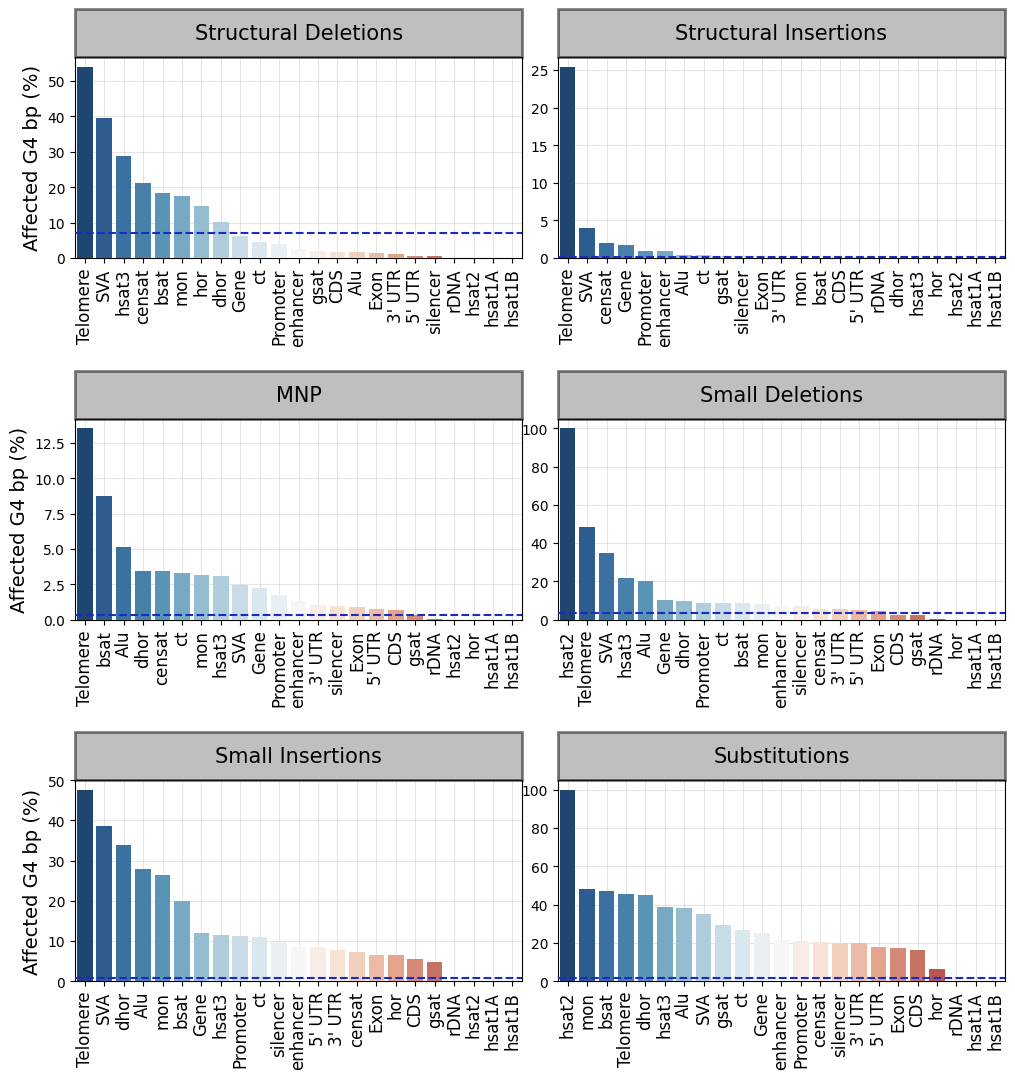

In [195]:
import numpy as np
from matplotlib.pyplot import Rectangle

fig, ax_ = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax_ = ax_.flatten()
fig.subplots_adjust(wspace=0.08, hspace=0.8)

mutation_labels = {
                   "snp": "Substitutions",
                   "mnp": "MNP",
                   "smalldel": "Small Deletions",
                   "smallins": "Small Insertions",
                   "del": "Structural Deletions",
                   "ins": "Structural Insertions"
                  }

mutation_types = coverage_mut_regex["mutation"].unique()

for i, mutation in enumerate(mutation_types):
    ax = ax_[i]
    data_mut = coverage_mut_regex.query(f"mutation == '{mutation}'").sort_values(by=['affected_g4_bp'], ascending=False)
    
    genome_wide = coverage_mut_regex_gw.query(f"mutation == '{mutation}'").iloc[0, -1]
    sns.barplot(data=data_mut,
                x="compartment", 
                palette="RdBu_r",
                # hue="compartment", 
                y="affected_g4_bp",
               zorder=3,
               ax=ax)
    ax.axhline(genome_wide, linestyle='--', color='#192AC5', lw=1.5, zorder=4)
    # ax.legend(loc=0, title="", bbox_to_anchor=(1.05, 0.95), prop={"size": 14})
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_axisbelow(True)
    ax.set_xlabel('')
    if i%2 == 0:
        ax.set_ylabel("Affected G4 bp (%)")
    else:
        ax.set_ylabel('')
        
    title = mutation_labels[mutation]
    # ax.set_title(mutation)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='x', labelsize=12, rotation=90)
    ax.tick_params(axis='y', labelsize=10)
 
    fig.canvas.draw()
    # Get the bounding box of the second subplot in figure coordinates
    bbox = ax.get_position()
    rect_height = 0.04  # Height of the rectangle relative to figure
    rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
    rect_left = bbox.x0  # Left aligns with the subplot
    rect_width = bbox.x1 - bbox.x0  # Width matches the subplot

    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                 edgecolor="black",
                                 linewidth=2.0,
                                 transform=fig.transFigure, 
                                 facecolor='gray', 
                                 alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, rect_bottom + rect_height / 2, 
             title, 
             ha='center', 
             va='center', 
             color='black', 
             fontsize=15)
 
fig.savefig("mr_regex_per_compartment.png", dpi=300, bbox_inches='tight')

## G4 Density within mutations

In [18]:
from tqdm import tqdm
from pathlib import Path
mutation_coverage = [file for file in Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/mutation_data/").glob("*.csv")]
mutation_coverage_files = []

window_size = 100
for file in tqdm(mutation_coverage, leave=True):
    window = int(file.name.split("_")[3])
    mutation = file.name.split("_")[1]
    if window == window_size:
        df = pd.read_csv(file)

        df.loc[:, "window"] = window_size
        mutation_coverage_files.append(df)
        
mutation_coverage_files = pd.concat(mutation_coverage_files)
mutation_coverage_files

100%|██████████| 80/80 [01:29<00:00,  1.12s/it]


,seqID,start,end,strand,sequence,gc_proportion,gc_content,sequence_length,totalHits,overlappingBp,compartmentLength,coverage,totalHits_control,overlappingBp_control,compartmentLength_control,coverage_control,window,mutation_type
0,chr1,42,243,+,ctaaccctaacccctaaaccctaaccctaaccctaaccctaaccct...,0.502488,101,201,30,201,201,1.000000,0,0,201,0.0,100,del
1,chr1,588,789,+,ccctaaccctaaccctaaccctaaccctaaccctaaccctaaccct...,0.507463,102,201,33,201,201,1.000000,0,0,201,0.0,100,del
2,chr1,994,1195,+,cctcaccctcaccctcaccctcaccctcaccctcaccctcaccctc...,0.572139,115,201,22,201,201,1.000000,0,0,201,0.0,100,del
3,chr1,1818,2019,+,ccctaaccctaaccctaaccccctaaccctaaccctaaccctaacc...,0.547264,110,201,13,143,201,0.711443,0,0,201,0.0,100,del
4,chr1,3178,3379,+,cagagaggcgcggcgcgccggcgcaggcgcagagaggcgcgtcccc...,0.800995,161,201,2,66,201,0.328358,0,0,201,0.0,100,del
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22059864,chrX,154259428,154259566,+,gggttagggttagggttagggttagggttagggtttagggttaggg...,0.507246,70,138,15,133,138,0.963768,0,0,138,0.0,100,snp
22059865,chrX,154259448,154259566,+,gttagggttagggtttagggttagggttagggttagggttagggtt...,0.500000,59,118,12,113,118,0.957627,0,0,118,0.0,100,snp
22059866,chrX,154259454,154259566,+,gttagggtttagggttagggttagggttagggttagggttagggtt...,0.500000,56,112,11,107,112,0.955357,0,0,112,0.0,100,snp
22059867,chrX,154259458,154259566,+,gggtttagggttagggttagggttagggttagggttagggttaggg...,0.509259,55,108,10,103,108,0.953704,0,0,108,0.0,100,snp


In [19]:
compartments_df = pd.read_table("/storage/group/izg5139/default/nicole/g4_t2t/datasets/compartments_T2T_coding_protein_coding.csv")
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_df

,seqID,start,end,compartment,biotype,comp
0,chr1,0,3000,Telomere,.,Telomere
1,chr1,7505,12982,Exon,non_coding,Non Coding Exons
2,chr1,7505,138480,Gene,non_coding,Non Coding Genes
3,chr1,12273,12571,Alu,.,Alu
4,chr1,13444,13584,Exon,non_coding,Non Coding Exons
...,...,...,...,...,...,...
2046768,chrY,62451062,62451171,Exon,non_coding,Non Coding Exons
2046769,chrY,62451556,62451910,Exon,non_coding,Non Coding Exons
2046770,chrY,62451910,62452910,Promoter,non_coding,Non Coding Promoters
2046771,chrY,62452320,62453637,censat,.,censat


In [20]:
import sys; sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts")
from dotenv import load_dotenv
loaded = load_dotenv("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/.env")
print(loaded)
from constants import ConfigPaths

True


In [21]:
from adjust_gc_content import adjust_for_gc_content, correct_multiple_comparisons

df_with_gc_g4_grped_adj = pl.from_pandas(mutation_coverage_files).group_by("mutation_type")\
                                        .agg(
                                                pl.col("overlappingBp").sum(),
                                                pl.col("overlappingBp_control").sum(),
                                                pl.col("compartmentLength").sum().alias("mutation_area_len"),
                                                pl.col("gc_content").sum()
                                        )\
                                        .with_columns(
                                                (pl.col("overlappingBp") * 1e6 / pl.col("mutation_area_len")).alias("density"),
                                                (pl.col("overlappingBp") / pl.col("overlappingBp_control")).alias("fe_control"),
                                                (pl.col("gc_content") / pl.col("mutation_area_len")).alias("gc_proportion")
                                            )\
                                        .with_columns(
                                                    (pl.col("density") / g4_gw_density).alias("fold_enrichment"),
                                        )
df_with_gc_g4_grped_adj = adjust_for_gc_content(df_with_gc_g4_grped_adj).with_columns(gc_stars=pl.col("pval").map_elements(GCAdjustmentResidualTest.evaluate_stars, return_dtype=str))
df_with_gc_g4_grped_adj = correct_multiple_comparisons(df_with_gc_g4_grped_adj, use_log=False)
df_with_gc_g4_grped_adj

/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/adjust_gc_content.py:127: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


NameError: name 'GCAdjustmentResidualTest' is not defined

/scratch/nmc6088/ipykernel_2630891/1288690324.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="mutation_type",


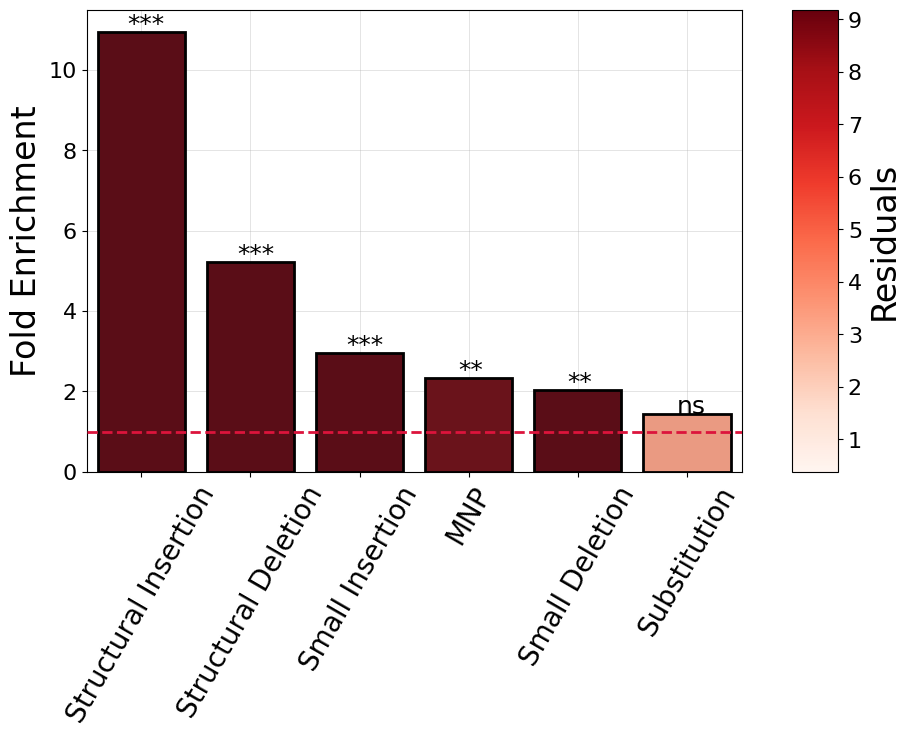

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

col = "res"
df = df_with_gc_g4_grped_adj.to_pandas().sort_values(by=['fold_enrichment'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
norm = plt.Normalize(df[col].min(), df[col].max())
cmap = plt.cm.Reds  # Choose a colormap

mutation_labels = {
                   "smalldel": "Small Deletion",
                   "smallins": "Small Insertion",
                   "del": "Structural Deletion",
                   "snp": "Substitution",
                   "ins": "Structural Insertion",
                   "mnp": "MNP",
                  }
df["mutation_type"] = df["mutation_type"].map(mutation_labels)
sig = list(df["adj_significance"])

# Plot
bars = sns.barplot(x="mutation_type", 
                   y="fold_enrichment", 
                   data=df, 
                   linewidth=2.0,
                   edgecolor='black',
                   ax=ax, 
                   palette=[cmap(v) for v in df[col]],
                  )

for i, patch in enumerate(bars.patches):
    if len(sig[i]) > 2:
        div = 2.9
    elif len(sig[i]) > 1:
        div = 2.6
    else:
        div = 2.2
    ax.text(
        patch.get_x() + patch.get_width() / div,
        patch.get_height(),
        # text=sig[i],
        fontsize=18,
        s=sig[i],
    )
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="x", labelsize=20, rotation=60)
ax.tick_params(axis="y", labelsize=16)
ax.yaxis.label.set_size(24)
ax.set_xlabel('')
ax.set_ylabel("Fold Enrichment")
ax.axhline(1.0, linestyle='--', color='crimson', lw=2.0, zorder=5)
ax.set_axisbelow(True)
cbar = plt.colorbar(sm, ax=ax, fraction=0.3, aspect=10)
cbar.set_label("Residuals", fontsize=24)
cbar.ax.tick_params(labelsize=16)  # Change the size of the tick labels

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_vs_controls_mutations").resolve()
target.mkdir(exist_ok=True, parents=True)
fig.savefig(f"{target}/mutation_density_fold_enrichment_g4_gc_cor_{window}.pdf", dpi=400, bbox_inches="tight")

In [ ]:
COLUMNS = ["seqID", 
          "start", 
          "end", 
          "gc_proportion", 
          "gc_content", 
          "sequence_length", 
           "mutation_type", 
           "window", 
           "overlappingBp", 
           "overlappingBp_control", 
           "compartmentLength", 
           "totalHits", 
           "coverage"]

mutation_coverage_files_bed = BedTool.from_dataframe(mutation_coverage_files[COLUMNS]).sort()
mutation_coverage_files_bed.count()

In [ ]:
mutation_coverage_compartments = pl.read_csv(
                                    mutation_coverage_files_bed.intersect(compartments_bed, f=1.0, wo=True).fn,
                                    has_header=False,
                                    separator="\t",
                                    new_columns=COLUMNS + ["chrom", "comp_start", "comp_end", "compartment", "biotype", "comp", "overlap"]
)
compartments_unique = list(set(mutation_coverage_compartments["compartment"]))
mutation_coverage_compartments.head()

In [ ]:
import sys; sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts")
from dotenv import load_dotenv
loaded = load_dotenv("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/.env")
print(loaded)
from constants import ConfigPaths

# load g4hunter
g4_df = pd.read_table(ConfigPaths.G4HUNTER.value)
g4_bed = BedTool.from_dataframe(g4_df.drop(columns=['NBR'])).sort()

# load control group
control_df = pd.read_table(ConfigPaths.CONTROL_G4HUNTER.value)
control_bed = BedTool.from_dataframe(control_df).sort()

# test validity of control group
control_bed.intersect(g4_bed).count()

In [ ]:
genome_size = pd.read_table(ConfigPaths.GENOME_SIZE.value, header=None)[1].sum()
genome_size

In [ ]:
# G4 DENSITY
g4_gw_density = pd.read_table(
                            g4_bed.sort().merge().fn, header=None, names=["seqID", "start", "end"]
)
g4_gw_density["size"] = g4_gw_density["end"] - g4_gw_density["start"]
g4_gw_density = g4_gw_density["size"].sum() * 1e6 / genome_size

# CONTROL DENSITY
control_gw_density = pd.read_table(
                            control_bed.sort().merge().fn, header=None, names=["seqID", "start", "end"]
)
control_gw_density["size"] = control_gw_density["end"] - control_gw_density["start"]
control_gw_density = control_gw_density["size"].sum() * 1e6 / genome_size

g4_gw_density, control_gw_density

In [ ]:
mutation_enrichment_comp = []
for compartment in tqdm(compartments_unique):

    if compartment in {"Promoter", "Gene", "Exon"}:
        biotypes = ["protein_coding", "non_coding"]
    else:
        biotypes = ["."]
        
    temp_comp = mutation_coverage_compartments.filter(pl.col("compartment") == compartment)
    for biotype in biotypes:
        temp = temp_comp.unique(["seqID", "start", "end"])

        if biotype != ".":
            temp = temp.filter(pl.col("biotype") == biotype)

        temp = temp.group_by("mutation_type")\
                                        .agg(
                                                pl.col("overlappingBp").sum(),
                                                pl.col("overlappingBp_control").sum(),
                                                pl.col("compartmentLength").sum().alias("mutation_area_len"),
                                                pl.col("gc_content").sum()
                                        )\
                                        .with_columns(
                                                (pl.col("overlappingBp") * 1e6 / pl.col("mutation_area_len")).alias("density"),
                                                (pl.col("overlappingBp") / pl.col("overlappingBp_control")).alias("fe_control"),
                                                (pl.col("gc_content") / pl.col("mutation_area_len")).alias("gc_proportion")
                                            )\
                                        .with_columns(
                                                    (pl.col("density") / g4_gw_density).alias("fold_enrichment"),
                                                    pl.lit(compartment).alias("compartment"),
                                                    pl.lit(biotype).alias("biotype")
                                        )\
                                        .with_columns(
                                                    (pl.col("compartment") + "," + pl.col("biotype")).alias("comp")
                                        )
        mutation_enrichment_comp.append(temp)
    
mutation_enrichment_comp = pl.concat(mutation_enrichment_comp)
mutation_enrichment_comp

In [ ]:
%load_ext autoreload
%autoreload 2
import adjust_gc_content
import importlib
importlib.reload(adjust_gc_content)
from adjust_gc_content import adjust_for_gc_content, GCAdjustmentResidualTest, correct_multiple_comparisons

mutation_enrichment_comp = mutation_enrichment_comp.filter(pl.col("fold_enrichment") > 0)

mutation_enrichment_comp_gc = adjust_for_gc_content(mutation_enrichment_comp).with_columns(gc_stars=pl.col("pval").map_elements(GCAdjustmentResidualTest.evaluate_stars, return_dtype=str))
mutation_enrichment_comp_gc = correct_multiple_comparisons(mutation_enrichment_comp_gc, use_log=False)
mutation_enrichment_comp_gc

In [ ]:
mutation_enrichment_comp_gc["adj_significance"].value_counts()

In [ ]:
mutation_enrichment_comp_gc["gc_stars"].value_counts()

In [ ]:
import math

mapping = {"Exon,protein_coding": "Protein Coding Exon",
           "Exon,non_coding": "Non Coding Exon",
           "Promoter,non_coding": "Non Coding Promoter",
           "Promoter,protein_coding": "Protein Coding Promoter",
           "Gene,non_coding": "Non Coding Gene",
           "Gene,protein_coding": "Protein Coding Gene",
           "five_prime_UTR": "5' UTR",
           "three_prime_UTR": "3' UTR",
          }

mutation_labels = {"snp": "Substitution",
                   "mnp": "MNP",
                   "smalldel": "Small Deletions",
                   "smallins": "Small Insertions",
                   "ins": "Structural Insertion",
                   "del": "Structural Deletion"
                  }
mutation_enrichment_comp_pivot = mutation_enrichment_comp_gc.filter(pl.col("fold_enrichment") > 0).pivot(index="comp", 
                                                                        on="mutation_type", 
                                                                        values="fold_enrichment")

data = mutation_enrichment_comp_pivot.filter(pl.col("comp") != "Telomere,.").to_pandas().dropna(axis=0).set_index("comp")
data.columns = [mutation_labels[col] for col in data.columns]
data.index = data.index.map(lambda x: x.split(",")[0] if "." in x else x)
data.index = data.index.map(lambda x: mapping.get(x, x))

# for col in data:
#    data[col] = data[col].apply(lambda x: math.log(x, 10) if x > 0.0 else np.nan)
data = data.dropna(axis=0)

cmap = "inferno"
cg = sns.clustermap(
                data=data, 
                cmap=cmap,
                cbar_pos=(0.01, 0.15, 0.05, 0.6),
                figsize=(8, 10),
                vmax=8,
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)
ax.tick_params(axis="x", rotation=90, labelsize=16)

cg.cax.set_ylabel("Fold Enrichment", fontsize=20)
cg.cax.tick_params(labelsize=14)


for i in range(len(data.columns) + 1):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
for i in range(len(data.index) + 2):
    ax.axhline(i, color="black", lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")

# Create a significance matrix aligned with the pivoted fold_enrichment values
significance_matrix = mutation_enrichment_comp_gc.filter(pl.col("fold_enrichment") > 0) \
    .filter(pl.col("comp") != "Telomere,.") \
    .to_pandas()

# Drop NaNs from fold enrichment to match heatmap content
sig_column = "adj_significance"
significance_matrix = significance_matrix.dropna(subset=["fold_enrichment", sig_column])

# Process 'comp' the same way as in the heatmap
significance_matrix["comp"] = significance_matrix["comp"].map(lambda x: x.split(",")[0] if "." in x else x)
significance_matrix["comp"] = significance_matrix["comp"].map(lambda x: mapping.get(x, x))

# Map mutation type labels
significance_matrix["mutation_type"] = significance_matrix["mutation_type"].map(mutation_labels)

# Pivot the significance stars
sig_stars = significance_matrix.pivot(index="comp", columns="mutation_type", values=sig_column)
sig_stars = sig_stars.loc[data.index, data.columns]  # Align exactly with heatmap

# Annotate the heatmap
for i, row in enumerate(sig_stars.index):
    for j, col in enumerate(sig_stars.columns):
        star = sig_stars.loc[row, col]
        if isinstance(star, str) and star.strip() != "" and star.strip() != "ns":
            ax.text(j + 0.5, i + 0.5, star, 
                    ha="center", 
                    va="center", 
                    fontsize=15, 
                    color="black")


fig = plt.gcf()
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_vs_controls_mutations").resolve()
target.mkdir(exist_ok=True, parents=True)
fig.savefig(f"{target}/mutation_g4_compartment_enrichment_{window}.{cmap}.pdf", dpi=300, bbox_inches="tight")

## G4 vs Controls

In [ ]:
df_with_gc_g4_grped_adj

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

col = "fe_control"
df = df_with_gc_g4_grped_adj.to_pandas().sort_values(by=['fe_control'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
norm = plt.Normalize(df[col].min(), df[col].max())
cmap = plt.cm.Reds  # Choose a colormap

mutation_labels = {"smalldel": "Small Deletion",
                   "smallins": "Small Insertion",
                   "del": "Structural Deletion",
                   "snp": "Substitution",
                   "ins": "Structural Insertion",
                   "mnp": "MNP"
                  }
df["mutation_type"] = df["mutation_type"].map(mutation_labels)


# Plot
bars = sns.barplot(x="mutation_type", 
                   y="fe_control", 
                   data=df, 
                   linewidth=2.0,
                   edgecolor='black',
                   color="gray",
                   ax=ax, 
                  )

# for i, patch in enumerate(bars.patches):
#     if len(sig[i]) > 2:
#         div = 2.9
#     elif len(sig[i]) > 1:
#         div = 2.6
#     else:
#         div = 2.2
#     ax.text(
#         patch.get_x() + patch.get_width() / div,
#         patch.get_height(),
#         # text=sig[i],
#         fontsize=18,
#         s=sig[i],
#     )
# Add colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="x", labelsize=20, rotation=60)
ax.tick_params(axis="y", labelsize=16)
ax.yaxis.label.set_size(24)
ax.set_xlabel('')
ax.set_ylabel("Fold Enriichment")
ax.axhline(1.0, linestyle='--', color='crimson', lw=2.0, zorder=5)
ax.set_axisbelow(True)
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label("Residuals", fontsize=24)

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_vs_controls_mutations").resolve()
target.mkdir(exist_ok=True, parents=True)
fig.savefig(f"{target}/mutation_density_fold_enrichment_g4_vs_control_{window_size}.pdf", dpi=300, bbox_inches="tight")

## Rolling Window Size and Fold Enrichment

In [131]:
mutations_df = []

files = [file for file in Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/data_mutations/").glob("*.csv")]

for file in files:
    mutations_df.append(pd.read_csv(file))
    window = int(file.name.split("_")[-1].split(".")[0])
    mutations_df[-1] = mutations_df[-1].assign(window=window)
    
mutations_df = pd.concat(mutations_df)
mutations_df.loc[:, "sig_stars_gc"] = mutations_df["pval"].apply(evaluate_stars)
mutations_df

,mutation_type,overlappingBp,mutation_area_len,overlappingBp_control,gc_content,density,density_control,gc_proportion,fold_enrichment,fold_enrichment_control,fe_enrichment_over_control,not_g4,not_control,pval,sig_stars,predicted_enrichment,res,percentile,window,sig_stars_gc
0,del,994009,10723281,246179,4818768,92696.349186,22957.432525,0.449374,5.223734,1.005066,5.197405,9729272,10477102,-4.440892e-16,***,1.579527,3.644206,100.000000,100,***
1,snp,112865007,4434013739,116759095,1864569407,25454.365648,26332.596576,0.420515,1.434434,1.152829,1.244273,4321148732,4317254644,5.631958e-02,***,1.053203,0.381231,97.184021,100,ns
2,smalldel,16729681,461766182,10300726,183976409,36229.766605,22307.233404,0.398419,2.041662,0.976600,2.090581,445036501,451465456,1.309758e-03,***,0.743808,1.297855,99.934512,100,**
3,mnp,5763267,138704108,3330643,60912169,41550.802518,24012.576470,0.439152,2.341520,1.051260,2.227347,132940841,135373465,6.548788e-03,***,1.377259,0.964261,99.672561,100,**
4,ins,5165423,26576321,417625,12177121,194361.853170,15714.176541,0.458194,10.952908,0.687959,15.920864,21410898,26158696,-4.440892e-16,***,1.768004,9.184904,100.000000,100,***
5,smallins,24151595,459743977,11219682,190422217,52532.705611,24404.195729,0.414192,2.960385,1.068404,2.770847,435592382,448524295,-4.440892e-16,***,0.956375,2.004010,100.000000,100,***
0,smallins,175304869,4575812475,116304098,1936236053,38311.200461,25417.146930,0.423146,2.158958,1.112751,1.940199,4400507606,4459508377,3.929273e-03,***,1.095448,1.063510,99.803536,1000,**
1,snp,991228534,44140586694,1080799353,18356402015,22456.170347,24485.387122,0.415862,1.265477,1.071959,1.180527,43149358160,43059787341,9.037328e-02,***,0.981307,0.284169,95.481336,1000,ns
2,smalldel,133941471,4596290264,112398294,1900140583,29141.212436,24454.133126,0.413407,1.642200,1.070591,1.533919,4462348793,4483891970,1.571709e-02,***,0.944826,0.697374,99.214145,1000,*
3,mnp,45407730,1380658385,32150535,603754409,32888.461399,23286.379418,0.437295,1.853369,1.019467,1.817979,1335250655,1348507850,3.012443e-02,***,1.342374,0.510996,98.493779,1000,*


In [133]:
from adjust_gc_content import correct_multiple_comparisons


mutations_df_corr = correct_multiple_comparisons(pl.from_pandas(mutations_df), use_log=False)
mutations_df_corr

mutation_type,overlappingBp,mutation_area_len,overlappingBp_control,gc_content,density,density_control,gc_proportion,fold_enrichment,fold_enrichment_control,fe_enrichment_over_control,not_g4,not_control,pval,sig_stars,predicted_enrichment,res,percentile,window,sig_stars_gc,adj_pval,adj_significance
str,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,str,f64,f64,f64,i64,str,f64,str
"""del""",994009,10723281,246179,4818768,92696.349186,22957.432525,0.449374,5.223734,1.005066,5.197405,9729272,10477102,-4.4409e-16,"""***""",1.579527,3.644206,100.0,100,"""***""",-2.6645e-14,"""***"""
"""snp""",112865007,4434013739,116759095,1864569407,25454.365648,26332.596576,0.420515,1.434434,1.152829,1.244273,4321148732,4317254644,0.05632,"""***""",1.053203,0.381231,97.184021,100,"""ns""",0.066258,"""ns"""
"""smalldel""",16729681,461766182,10300726,183976409,36229.766605,22307.233404,0.398419,2.041662,0.9766,2.090581,445036501,451465456,0.00131,"""***""",0.743808,1.297855,99.934512,100,"""**""",0.003023,"""**"""
"""mnp""",5763267,138704108,3330643,60912169,41550.802518,24012.57647,0.439152,2.34152,1.05126,2.227347,132940841,135373465,0.006549,"""***""",1.377259,0.964261,99.672561,100,"""**""",0.011907,"""*"""
"""ins""",5165423,26576321,417625,12177121,194361.85317,15714.176541,0.458194,10.952908,0.687959,15.920864,21410898,26158696,-4.4409e-16,"""***""",1.768004,9.184904,100.0,100,"""***""",-1.3323e-14,"""***"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""smalldel""",121722172,4136967079,101189252,1709320396,29423.045839,24459.767281,0.413182,1.658082,1.070837,1.548398,4015244907,4035777827,0.014407,"""***""",0.941526,0.716556,99.279633,900,"""*""",0.020582,"""*"""
"""snp""",898205814,39728834856,975028353,16527864563,22608.410673,24542.08276,0.416017,1.274056,1.074441,1.185785,38830629042,38753806503,0.086444,"""***""",0.983639,0.290417,95.6778,900,"""ns""",0.087909,"""ns"""
"""del""",5476465,96071854,2317678,42410655,57003.844227,24124.422539,0.441447,3.212348,1.056156,3.041546,90595389,93754176,-4.4409e-16,"""***""",1.421164,1.791184,100.0,900,"""***""",-1.2112e-15,"""***"""


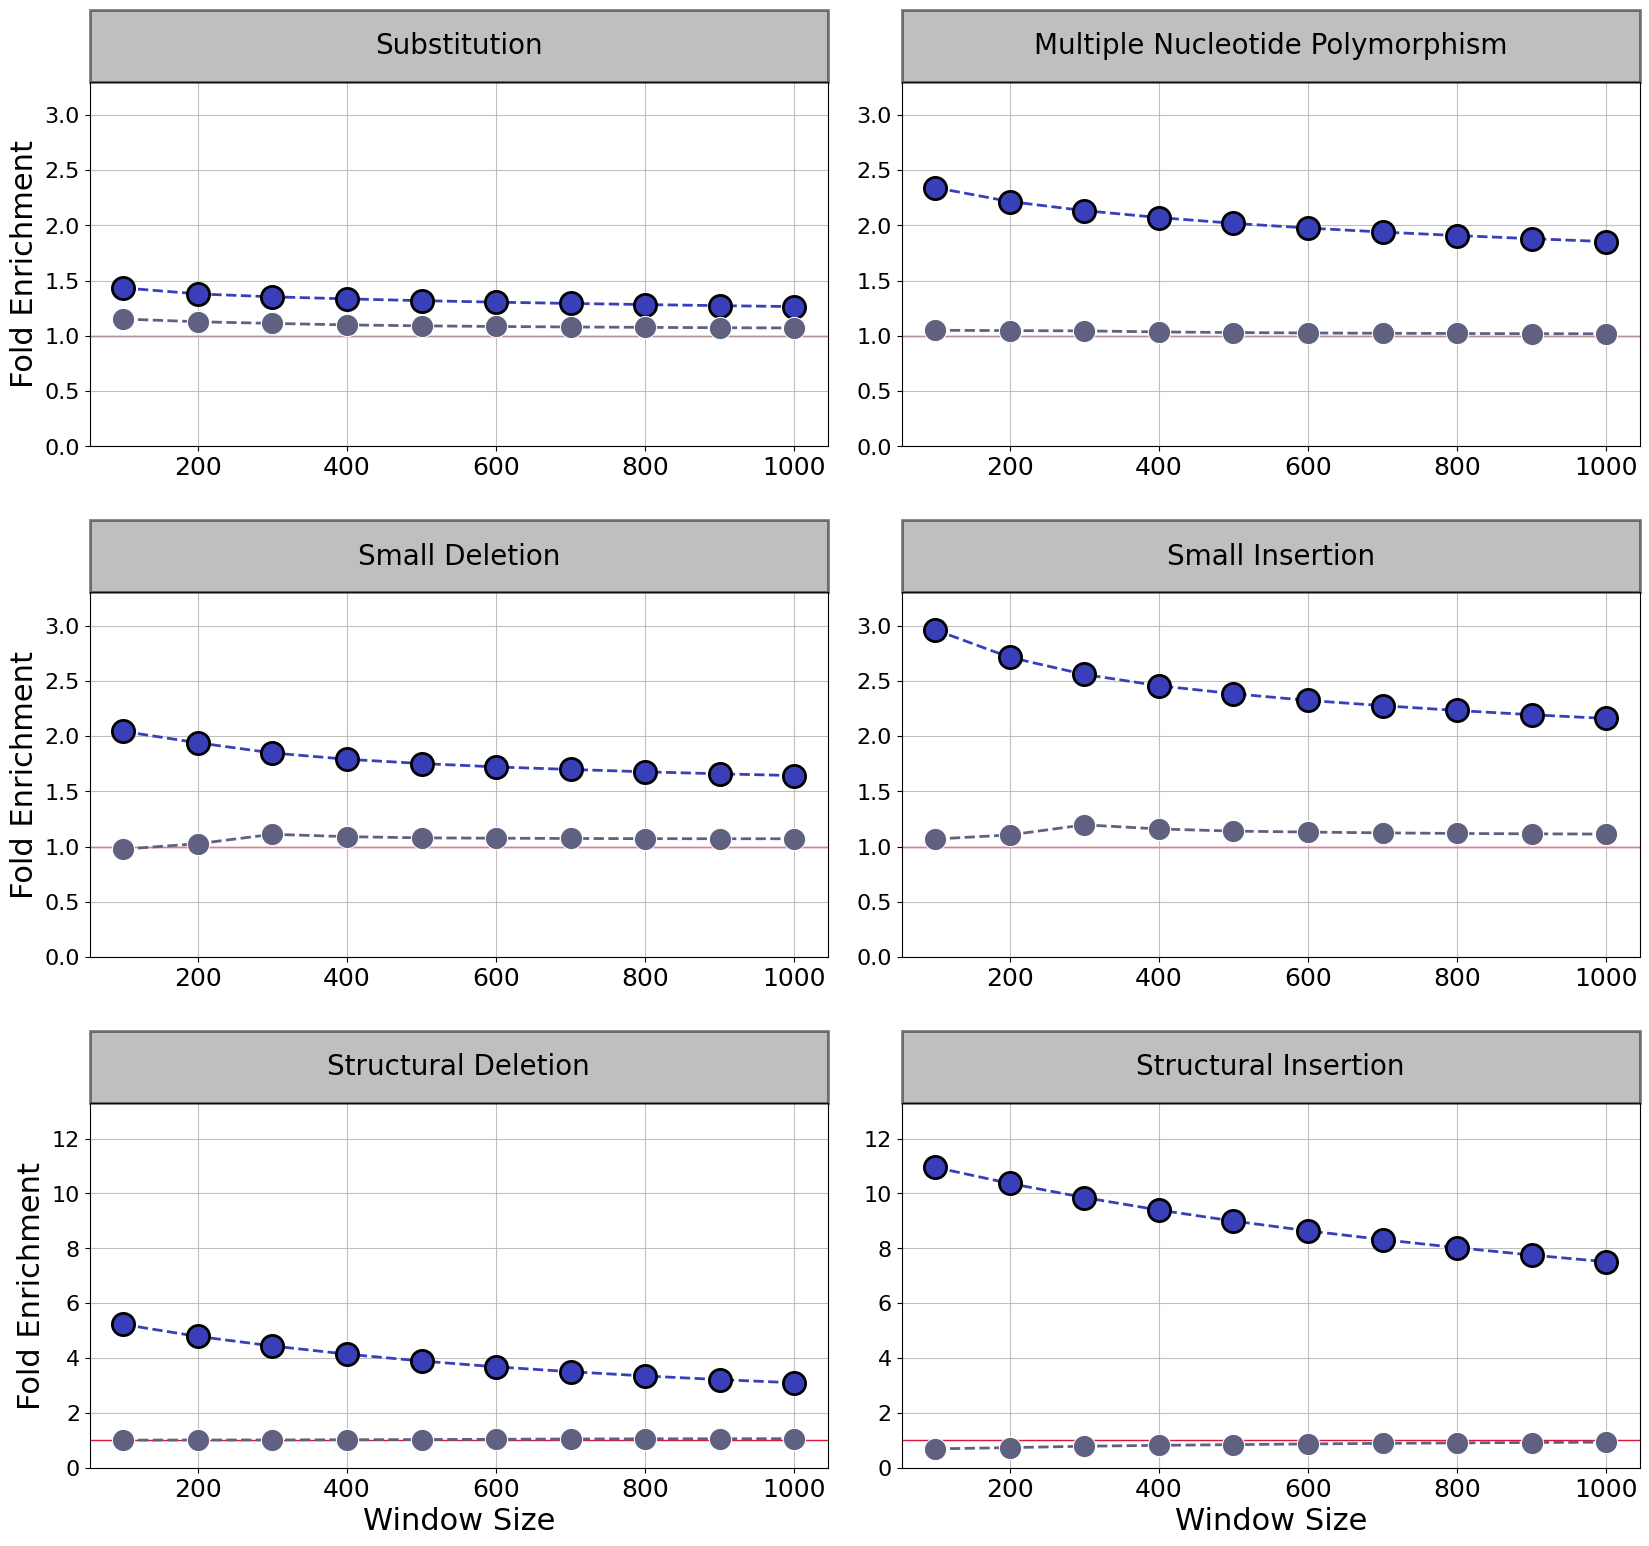

In [62]:
from matplotlib.pyplot import Rectangle
fig, ax_ = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
ax_ = ax_.flatten()

fig.subplots_adjust(hspace=0.4, wspace=0.1)

mutations = mutations_df["mutation_type"].unique()
mutations = ["snp", "mnp", "smalldel", "smallins", "del", "ins"]
mutation_titles = {
                   "smalldel": "Small Deletion",
                   "smallins": "Small Insertion",
                   "ins": "Structural Insertion",
                   "del": "Structural Deletion",
                   "snp": "Substitution",
                     "mnp": "Multiple Nucleotide Polymorphism",
                  }

for i, mutation in enumerate(mutations):
    ax = ax_[i]
    
    temp = mutations_df.query(f"mutation_type == '{mutation}'")

    max_ = temp["fold_enrichment"].max()
    sns.lineplot(data=temp, 
            x="window", 
            # size="res",
            y="fold_enrichment", 
            ax=ax, 
            color="#393fb8",
             linestyle='--',
             lw=2.0,
             marker='o',
             markersize=16,
            markerfacecolor='#393fb8',  
            markeredgecolor='black',
            markeredgewidth=2.0 
            )
    sns.lineplot(data=temp, 
                x="window", 
                y="fold_enrichment_control", 
                ax=ax, 
                 color="#606180",
                 linestyle='--',
                 lw=2.0,
                 marker='o',
                 markersize=16,
                # capsize=.1
                )
    if i%2 != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Fold Enrichment")
        
    if mutation == "del" or mutation == "ins":
        ax.set_ylim(ymin=0, ymax=max(13, max_) + 0.3)
    else:
        ax.set_ylim(ymin=0, ymax=max(3, max_) + 0.3)

    ax.grid(alpha=0.8, zorder=0)
    if i == 4 or i == 5:
        ax.set_xlabel("Window Size")
    else:
        ax.set_xlabel("")
        
    ax.xaxis.label.set_size(22)
    ax.yaxis.label.set_size(22)
    ax.set_axisbelow(True)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=16)
    ax.axhline(1.0, linestyle='-', lw=1.0, color='crimson', zorder=0)

    fig.canvas.draw()
    bbox = ax.get_position()
    rect_height = 0.04
    rect_bottom = bbox.y1 
    rect_left = bbox.x0
    rect_width = bbox.x1 - bbox.x0
    
    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), 
                                 rect_width, 
                                 rect_height,
                                 edgecolor="black",
                                 linewidth=2.0,
                                 transform=fig.transFigure, 
                                 facecolor='gray', 
                                 alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, 
             rect_bottom + rect_height / 2, 
             # title=site, 
             s=mutation_titles[mutation],
             ha='center', 
             va='center', 
             color='black', 
             fontsize=20
            )
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_vs_controls_mutations").resolve()
target.mkdir(exist_ok=True, parents=True)
fig.savefig(f"{target}/g4hunter_mutations_across_windows_vs_controls.pdf", dpi=300, bbox_inches="tight")

## GC Content Adjustment

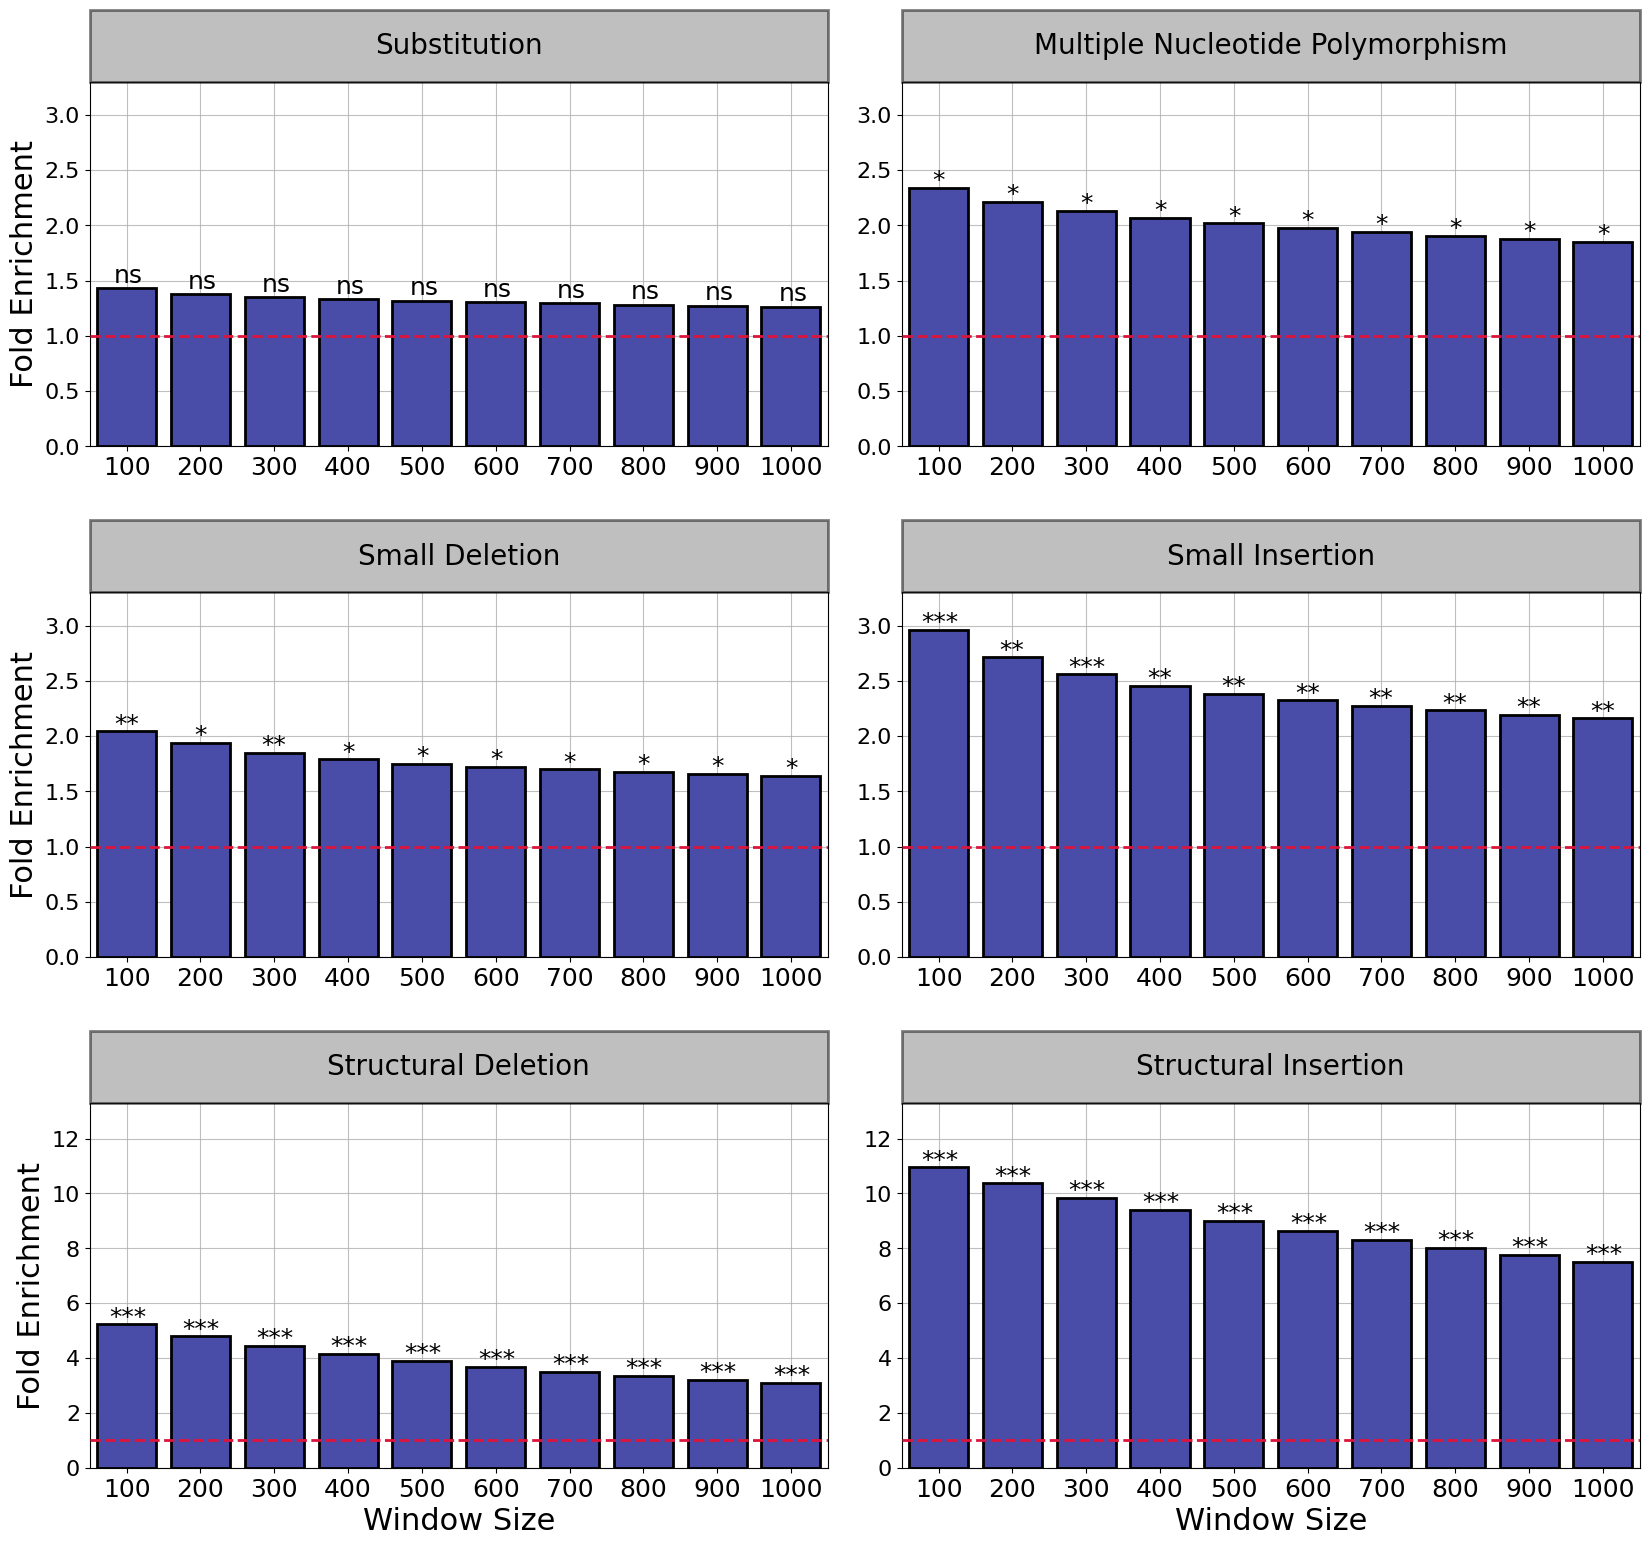

In [135]:
from matplotlib.pyplot import Rectangle
fig, ax_ = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
ax_ = ax_.flatten()

fig.subplots_adjust(hspace=0.4, wspace=0.1)

mutations = mutations_df_corr["mutation_type"].unique()
mutations = ["snp", "mnp", "smalldel", "smallins", "del", "ins"]
mutation_titles = {
                   "smalldel": "Small Deletion",
                   "smallins": "Small Insertion",
                   "ins": "Structural Insertion",
                 "del": "Structural Deletion",
                  "snp": "Substitution",
                 "mnp": "Multiple Nucleotide Polymorphism",
                  }

gc_adjustment_pvalues = mutations
for i, mutation in enumerate(mutations):
    ax = ax_[i]
    
    temp = mutations_df_corr.to_pandas().query(f"mutation_type == '{mutation}'")
    gc_adjustment_pvalues = list(temp["adj_significance"])
    

    max_ = temp["fold_enrichment"].max()
    barplot = sns.barplot(data=temp, 
            x="window", 
            # size="res",
            y="fold_enrichment", 
            ax=ax, 
            color="#393fb8",
             linestyle='-',
             lw=2.0,
             edgecolor='black',
            # capsize=.1
            )


    for j, patch in enumerate(barplot.patches):
        val = gc_adjustment_pvalues[j].strip()
        length_val = len(val)
        if length_val == 1:
            div = 2.5
        elif length_val == 2:
            div = 3.5
        else:
            div = 5.0
        if val == "ns":
            offset = 0.05
        else:
            offset = 0.0
        ax.text(patch.get_x() + patch.get_width() / div, patch.get_height() + offset, val, fontsize=18)
        
    # sns.lineplot(data=temp, 
    #             x="window", 
    #             y="fold_enrichment_control", 
    #             ax=ax, 
    #              color="gray",
    #              linestyle='--',
    #              lw=2.0,
    #              marker='o',
    #              markersize=16,
    #             # capsize=.1
    #             )
    if i%2 != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Fold Enrichment")
        
    if mutation == "del" or mutation == "ins":
        ax.set_ylim(ymin=0, ymax=max(13, max_) + 0.3)
    else:
        ax.set_ylim(ymin=0, ymax=max(3, max_) + 0.3)

    ax.grid(alpha=0.8, zorder=0)
    if i == 4 or i == 5:
        ax.set_xlabel("Window Size")
    else:
        ax.set_xlabel("")
        
    ax.xaxis.label.set_size(22)
    ax.yaxis.label.set_size(22)
    ax.set_axisbelow(True)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=16)
    ax.axhline(1.0, linestyle='--', lw=2.0, color='crimson', zorder=3)

    fig.canvas.draw()
    bbox = ax.get_position()
    rect_height = 0.04
    rect_bottom = bbox.y1 
    rect_left = bbox.x0
    rect_width = bbox.x1 - bbox.x0
    
    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), 
                                 rect_width, 
                                 rect_height,
                                 edgecolor="black",
                                 linewidth=2.0,
                                 transform=fig.transFigure, 
                                 facecolor='gray', 
                                 alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, 
             rect_bottom + rect_height / 2, 
             # title=site, 
             s=mutation_titles[mutation],
             ha='center', 
             va='center', 
             color='black', 
             fontsize=20
            )
target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/g4_vs_controls_mutations").resolve()
target.mkdir(exist_ok=True, parents=True)
fig.savefig(f"{target}/g4hunter_mutations_across_windows_gc_adjustment.adjusted_significance.pdf", dpi=300, bbox_inches="tight")